6-QUBIT EVEN/ODD MIXERS: Rxx+Ryy vs XX+YY
Creating two versions of 6-qubit even/odd mixers:
1. Rxx+Ryy version: Sequential XX then YY on each pair
2. XX+YY version: Uniform XY interactions
Topology: Layered approach forming complete ring
Even Layer: (0,1), (2,3), (4,5)
Odd Layer:  (1,2), (3,4), (5,0) ← closes ring
✓ Saved Rxx/Ryy circuit as '6qubit_rxx_ryy_mixer.png'


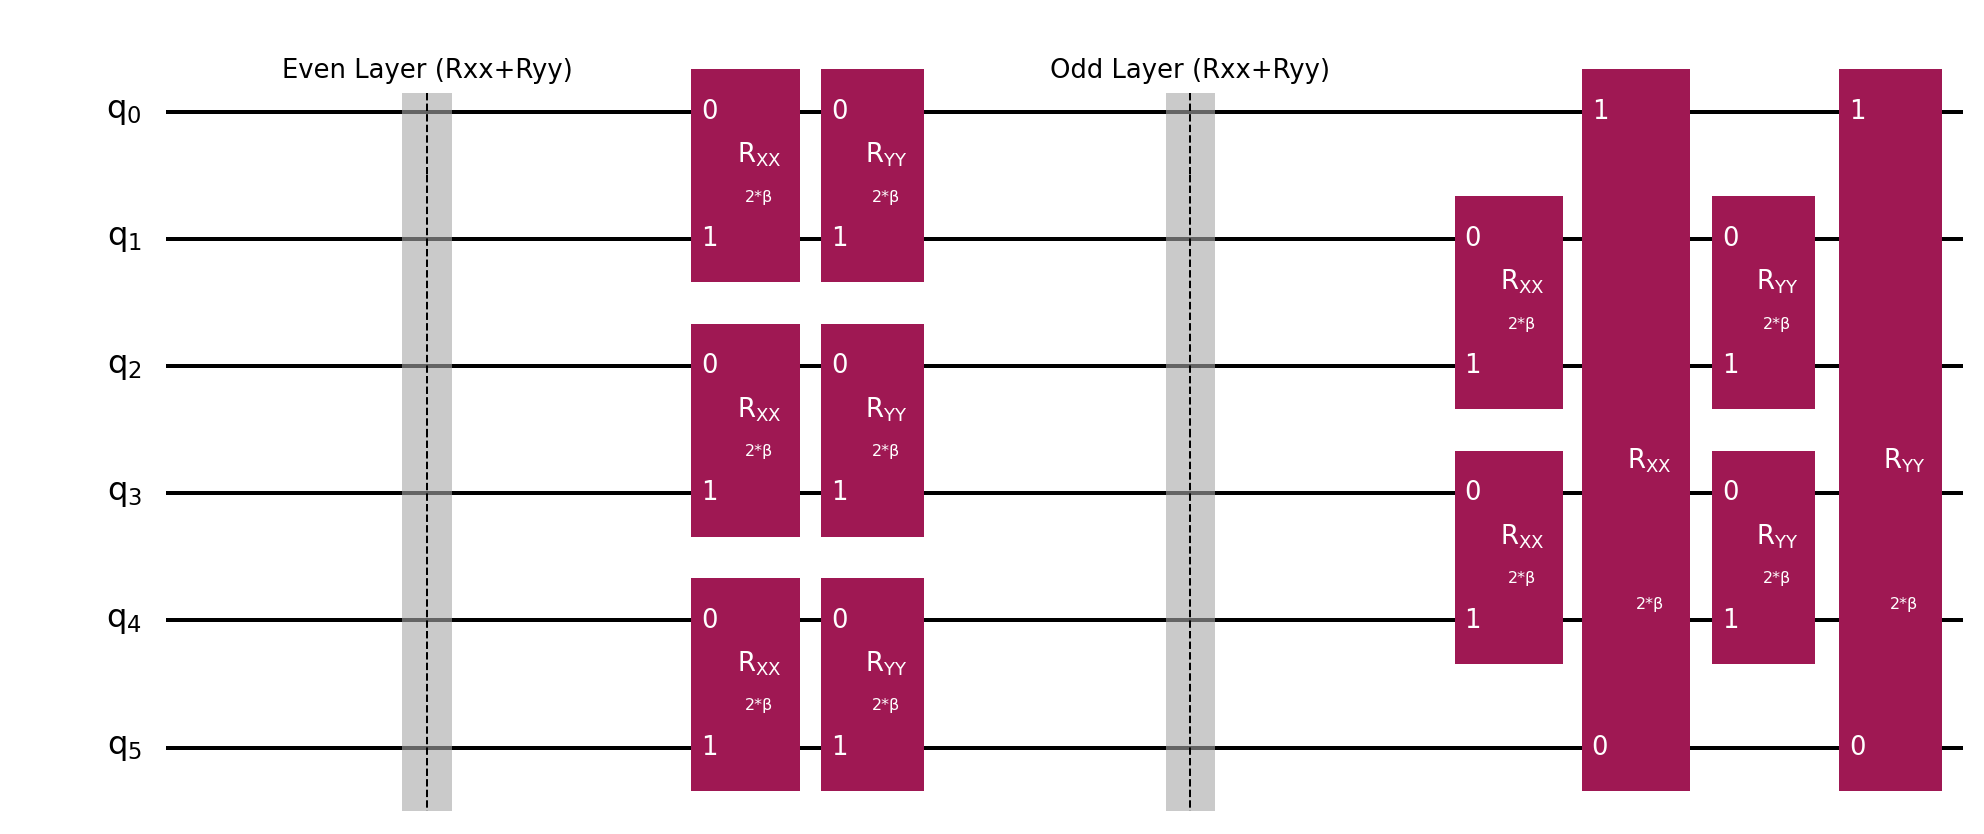

✓ Saved XX+YY circuit as '6qubit_xxplusyy_mixer.png'


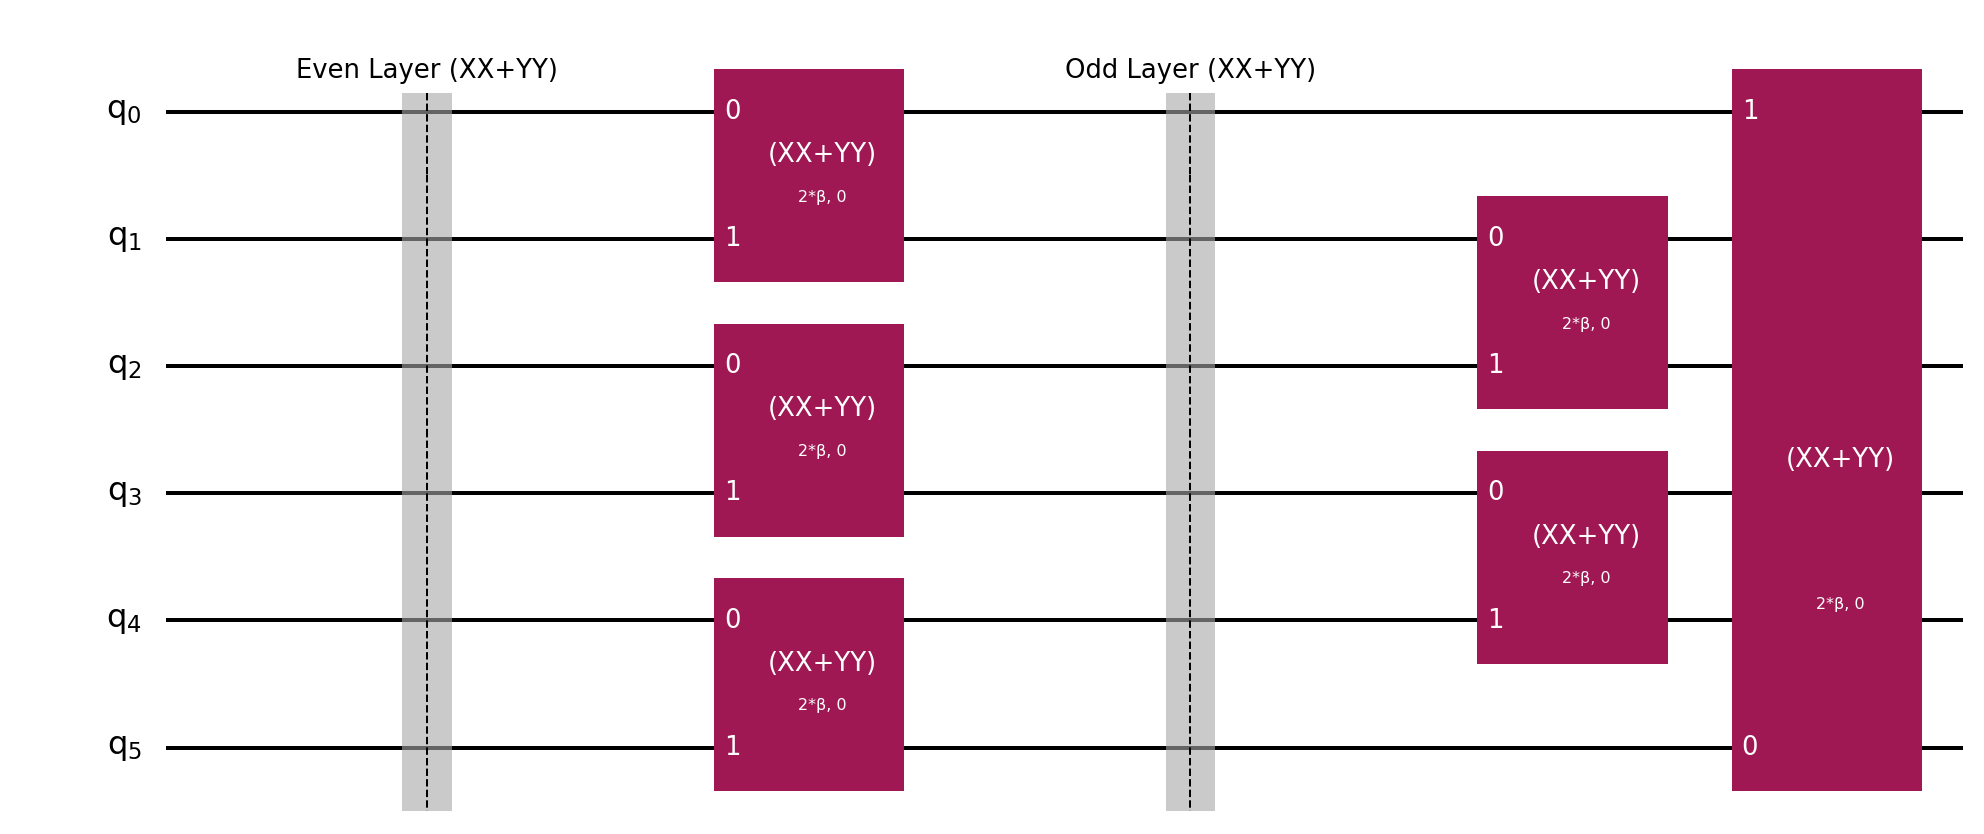


Rxx/Ryy Circuit text representation:
      Even Layer (Rxx+Ryy) ┌───────────┐┌───────────┐ Odd Layer (Rxx+Ryy) »
q_0: ──────────░───────────┤0          ├┤0          ├──────────░──────────»
               ░           │  Rxx(2*β) ││  Ryy(2*β) │          ░          »
q_1: ──────────░───────────┤1          ├┤1          ├──────────░──────────»
               ░           ├───────────┤├───────────┤          ░          »
q_2: ──────────░───────────┤0          ├┤0          ├──────────░──────────»
               ░           │  Rxx(2*β) ││  Ryy(2*β) │          ░          »
q_3: ──────────░───────────┤1          ├┤1          ├──────────░──────────»
               ░           ├───────────┤├───────────┤          ░          »
q_4: ──────────░───────────┤0          ├┤0          ├──────────░──────────»
               ░           │  Rxx(2*β) ││  Ryy(2*β) │          ░          »
q_5: ──────────░───────────┤1          ├┤1          ├──────────░──────────»
               ░           └───────────┘└─────────

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
from qiskit.circuit import Parameter

# Fix font warnings
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial', 'sans-serif']
plt.rcParams['mathtext.default'] = 'regular'

def create_rxx_ryy_interaction(qc, qubit1, qubit2, beta_param):
    """Add both Rxx and Ryy interactions between two qubits."""
    qc.rxx(2*beta_param, qubit1, qubit2)
    qc.ryy(2*beta_param, qubit1, qubit2)

def create_xxplusyy_interaction(qc, qubit1, qubit2, beta_param):
    """Add a single XX+YY interaction between two qubits."""
    # XX+YY gate can be implemented as a combination of Rxx and Ryy
    # or using the native XX+YY gate if available
    try:
        # Try to use native XX+YY gate (newer Qiskit versions)
        from qiskit.circuit.library import XXPlusYYGate
        qc.append(XXPlusYYGate(2*beta_param), [qubit1, qubit2])
    except ImportError:
        # Fallback: implement XX+YY as Rxx + Ryy combination
        qc.rxx(beta_param, qubit1, qubit2)
        qc.ryy(beta_param, qubit1, qubit2)

def create_6qubit_even_odd_rxx_ryy_mixer(beta=np.pi/8):
    """Create the 6-qubit even/odd mixer with Rxx followed by Ryy gates."""
    
    qc = QuantumCircuit(6, name='6Q_EvenOdd_Rxx_Ryy_Mixer')
    
    # Create symbolic parameter for display
    beta_param = Parameter('β')
    
    # EVEN LAYER: Rxx + Ryy gates on even pairs
    qc.barrier(label='Even Layer (Rxx+Ryy)')
    
    # (0,1) - First even connection with Rxx + Ryy
    create_rxx_ryy_interaction(qc, 0, 1, beta_param)
    
    # (2,3) - Second even connection with Rxx + Ryy
    create_rxx_ryy_interaction(qc, 2, 3, beta_param)
    
    # (4,5) - Third even connection with Rxx + Ryy
    create_rxx_ryy_interaction(qc, 4, 5, beta_param)
    
    # ODD LAYER: Rxx + Ryy gates on odd pairs
    qc.barrier(label='Odd Layer (Rxx+Ryy)')
    
    # (1,2) - First odd connection with Rxx + Ryy
    create_rxx_ryy_interaction(qc, 1, 2, beta_param)
    
    # (3,4) - Second odd connection with Rxx + Ryy
    create_rxx_ryy_interaction(qc, 3, 4, beta_param)
    
    # (5,0) - Third odd connection with Rxx + Ryy - CLOSES THE RING!
    create_rxx_ryy_interaction(qc, 5, 0, beta_param)
    
    # For simulation, we need to bind the parameter to actual values
    try:
        qc_bound = qc.assign_parameters({beta_param: beta})
    except AttributeError:
        # Fallback: create a separate numerical circuit
        qc_bound = QuantumCircuit(6, name='6Q_EvenOdd_Rxx_Ryy_Mixer_Bound')
        
        # Even layer - Rxx + Ryy gates
        qc_bound.barrier()
        create_rxx_ryy_interaction(qc_bound, 0, 1, beta)
        create_rxx_ryy_interaction(qc_bound, 2, 3, beta)
        create_rxx_ryy_interaction(qc_bound, 4, 5, beta)
        
        # Odd layer - Rxx + Ryy gates
        qc_bound.barrier()
        create_rxx_ryy_interaction(qc_bound, 1, 2, beta)
        create_rxx_ryy_interaction(qc_bound, 3, 4, beta)
        create_rxx_ryy_interaction(qc_bound, 5, 0, beta)  # Closes the ring
    
    return qc, qc_bound

def create_6qubit_even_odd_xxplusyy_mixer(beta=np.pi/8):
    """Create the 6-qubit even/odd mixer with XX+YY gates."""
    
    qc = QuantumCircuit(6, name='6Q_EvenOdd_XXplusYY_Mixer')
    
    # Create symbolic parameter for display
    beta_param = Parameter('β')
    
    # EVEN LAYER: XX+YY gates on even pairs
    qc.barrier(label='Even Layer (XX+YY)')
    
    # (0,1) - First even connection with XX+YY
    create_xxplusyy_interaction(qc, 0, 1, beta_param)
    
    # (2,3) - Second even connection with XX+YY
    create_xxplusyy_interaction(qc, 2, 3, beta_param)
    
    # (4,5) - Third even connection with XX+YY
    create_xxplusyy_interaction(qc, 4, 5, beta_param)
    
    # ODD LAYER: XX+YY gates on odd pairs
    qc.barrier(label='Odd Layer (XX+YY)')
    
    # (1,2) - First odd connection with XX+YY
    create_xxplusyy_interaction(qc, 1, 2, beta_param)
    
    # (3,4) - Second odd connection with XX+YY
    create_xxplusyy_interaction(qc, 3, 4, beta_param)
    
    # (5,0) - Third odd connection with XX+YY - CLOSES THE RING!
    create_xxplusyy_interaction(qc, 5, 0, beta_param)
    
    # For simulation, we need to bind the parameter to actual values
    try:
        qc_bound = qc.assign_parameters({beta_param: beta})
    except AttributeError:
        # Fallback: create a separate numerical circuit
        qc_bound = QuantumCircuit(6, name='6Q_EvenOdd_XXplusYY_Mixer_Bound')
        
        # Even layer - XX+YY gates
        qc_bound.barrier()
        create_xxplusyy_interaction(qc_bound, 0, 1, beta)
        create_xxplusyy_interaction(qc_bound, 2, 3, beta)
        create_xxplusyy_interaction(qc_bound, 4, 5, beta)
        
        # Odd layer - XX+YY gates
        qc_bound.barrier()
        create_xxplusyy_interaction(qc_bound, 1, 2, beta)
        create_xxplusyy_interaction(qc_bound, 3, 4, beta)
        create_xxplusyy_interaction(qc_bound, 5, 0, beta)  # Closes the ring
    
    return qc, qc_bound

def plot_6qubit_circuits():
    """Plot both the Rxx/Ryy and XX+YY mixer circuits."""
    
    # Create both circuits
    qc_rxx_ryy, qc_rxx_ryy_bound = create_6qubit_even_odd_rxx_ryy_mixer()
    qc_xxplusyy, qc_xxplusyy_bound = create_6qubit_even_odd_xxplusyy_mixer()
    
    # Plot Rxx/Ryy circuit
    try:
        fig, ax = plt.subplots(figsize=(20, 10))
        qc_rxx_ryy.draw(output='mpl', ax=ax, style='default', fold=None, scale=0.8)
        
        plt.tight_layout()
        plt.savefig('6qubit_rxx_ryy_mixer.png', dpi=600, bbox_inches='tight', 
                    facecolor='white', edgecolor='none')
        
        print("✓ Saved Rxx/Ryy circuit as '6qubit_rxx_ryy_mixer.png'")
        plt.show()
        
    except Exception as e:
        print(f"Failed to plot Rxx/Ryy circuit: {e}")
    
    # Plot XX+YY circuit
    try:
        fig, ax = plt.subplots(figsize=(20, 10))
        qc_xxplusyy.draw(output='mpl', ax=ax, style='default', fold=None, scale=0.8)
        
        plt.tight_layout()
        plt.savefig('6qubit_xxplusyy_mixer.png', dpi=600, bbox_inches='tight', 
                    facecolor='white', edgecolor='none')
        
        print("✓ Saved XX+YY circuit as '6qubit_xxplusyy_mixer.png'")
        plt.show()
        
    except Exception as e:
        print(f"Failed to plot XX+YY circuit: {e}")
    
    # Show text representations
    print("\nRxx/Ryy Circuit text representation:")
    print(qc_rxx_ryy.draw(output='text'))
    
    print("\nXX+YY Circuit text representation:")
    print(qc_xxplusyy.draw(output='text'))
    
    return qc_rxx_ryy, qc_rxx_ryy_bound, qc_xxplusyy, qc_xxplusyy_bound

def demonstrate_gate_effects():
    """Demonstrate what the different gate types do."""
    
    try:
        from qiskit_aer import Aer
        from qiskit import transpile
        use_aer = True
    except ImportError:
        try:
            from qiskit import Aer
            from qiskit import transpile
            use_aer = True
        except ImportError:
            from qiskit.quantum_info import Statevector
            use_aer = False
    
    print("\nGATE COMPARISON:")
    print("="*40)
    print("Using β = π/8 for demonstration")
    print("Testing with initial state |000001⟩")
    print()
    
    initial_state = '000001'
    
    # Test Rxx/Ryy mixer
    qc_rxx = QuantumCircuit(6)
    for i, bit in enumerate(initial_state):
        if bit == '1':
            qc_rxx.x(i)
    
    _, rxx_ryy_mixer_bound = create_6qubit_even_odd_rxx_ryy_mixer(beta=np.pi/8)
    qc_rxx = qc_rxx.compose(rxx_ryy_mixer_bound)
    
    # Test XX+YY mixer
    qc_xxyy = QuantumCircuit(6)
    for i, bit in enumerate(initial_state):
        if bit == '1':
            qc_xxyy.x(i)
    
    _, xxplusyy_mixer_bound = create_6qubit_even_odd_xxplusyy_mixer(beta=np.pi/8)
    qc_xxyy = qc_xxyy.compose(xxplusyy_mixer_bound)
    
    if use_aer:
        backend = Aer.get_backend('statevector_simulator')
        
        # Run Rxx/Ryy circuit
        transpiled_rxx = transpile(qc_rxx, backend)
        job_rxx = backend.run(transpiled_rxx)
        result_rxx = job_rxx.result()
        statevector_rxx = result_rxx.get_statevector()
        
        # Run XX+YY circuit
        transpiled_xxyy = transpile(qc_xxyy, backend)
        job_xxyy = backend.run(transpiled_xxyy)
        result_xxyy = job_xxyy.result()
        statevector_xxyy = result_xxyy.get_statevector()
    else:
        statevector_rxx = Statevector.from_instruction(qc_rxx)
        statevector_xxyy = Statevector.from_instruction(qc_xxyy)
    
    print(f"Initial state: |{initial_state}⟩")
    print()
    
    # Show Rxx/Ryy results
    print("After Rxx/Ryy mixer:")
    probs_rxx = np.abs(statevector_rxx)**2
    top_indices_rxx = np.argsort(probs_rxx)[-5:][::-1]
    
    for idx in top_indices_rxx:
        if probs_rxx[idx] > 0.001:
            binary_state = format(idx, '06b')
            print(f"  |{binary_state}⟩: {probs_rxx[idx]:.3f}")
    
    print()
    
    # Show XX+YY results
    print("After XX+YY mixer:")
    probs_xxyy = np.abs(statevector_xxyy)**2
    top_indices_xxyy = np.argsort(probs_xxyy)[-5:][::-1]
    
    for idx in top_indices_xxyy:
        if probs_xxyy[idx] > 0.001:
            binary_state = format(idx, '06b')
            print(f"  |{binary_state}⟩: {probs_xxyy[idx]:.3f}")

def explain_gate_types():
    """Explain the different gate types used."""
    
    print("\nGATE TYPE EXPLANATIONS:")
    print("="*35)
    
    print("Rxx(β) - XX Rotation Gate:")
    print("  • Rotates around XX axis in Bloch sphere")
    print("  • Matrix: exp(-i β/2 X⊗X)")
    print("  • Preserves |00⟩ and |11⟩ states")
    print("  • Mixes |01⟩ ↔ |10⟩ states")
    print()
    
    print("Ryy(β) - YY Rotation Gate:")
    print("  • Rotates around YY axis in Bloch sphere")
    print("  • Matrix: exp(-i β/2 Y⊗Y)")
    print("  • Preserves |00⟩ and |11⟩ states")
    print("  • Mixes |01⟩ ↔ |10⟩ states (with phase)")
    print()
    
    print("XX+YY(β) - Combined XY Interaction:")
    print("  • Combination of XX and YY rotations")
    print("  • More general XY-type interaction")
    print("  • Can be implemented as Rxx + Ryy")
    print("  • Provides richer mixing dynamics")
    print()
    
    print("MIXER PATTERN COMPARISON:")
    print("  Rxx+Ryy Mixer:")
    print("    → Even layers: Rxx(β) + Ryy(β) on each pair")
    print("    → Odd layers: Rxx(β) + Ryy(β) on each pair")
    print("    → Sequential XX then YY interactions")
    print()
    
    print("  XX+YY Mixer:")
    print("    → All layers: XX+YY gates")
    print("    → Uniform interaction type")
    print("    → More symmetric mixing")

def visualize_connectivity():
    """Create a visual representation of the connectivity pattern."""
    
    print("\nCONNECTIVITY VISUALIZATION:")
    print("="*40)
    
    print("Qubit Layout (Ring Topology):")
    print("  q0 ────── q1")
    print("   │         │")
    print("   │    q2 ─ q3")
    print("   │     │   │")
    print("   │     │   │")
    print("   └─ q5 ─── q4")
    print()
    
    print("Layer Breakdown:")
    print("  Even Layer: (0,1), (2,3), (4,5)")
    print("  Odd Layer:  (1,2), (3,4), (5,0)")
    print()
    
    print("Complete Ring Path:")
    print("  0 → 1 → 2 → 3 → 4 → 5 → 0")
    print("  ↑________________________|")
    print()
    
    print("Gate Types per Layer:")
    print("  Rxx+Ryy Version:")
    print("    Even: Rxx(β) + Ryy(β) on (0,1), (2,3), (4,5)")
    print("    Odd:  Rxx(β) + Ryy(β) on (1,2), (3,4), (5,0)")
    print()
    print("  XX+YY Version:")
    print("    Even: XX+YY(β) on (0,1), (2,3), (4,5)")
    print("    Odd:  XX+YY(β) on (1,2), (3,4), (5,0)")

def main():
    """Generate and demonstrate both mixer types."""
    
    print("6-QUBIT EVEN/ODD MIXERS: Rxx+Ryy vs XX+YY")
    print("="*55)
    print("Creating two versions of 6-qubit even/odd mixers:")
    print("1. Rxx+Ryy version: Sequential XX then YY on each pair")
    print("2. XX+YY version: Uniform XY interactions")
    print("Topology: Layered approach forming complete ring")
    print("Even Layer: (0,1), (2,3), (4,5)")
    print("Odd Layer:  (1,2), (3,4), (5,0) ← closes ring")
    print()
    
    # Plot both circuits
    circuits = plot_6qubit_circuits()
    
    # Demonstrate the effects
    demonstrate_gate_effects()
    
    # Explain the gate types
    explain_gate_types()
    
    # Show connectivity
    visualize_connectivity()
    
    print("\n" + "="*55)
    print("6-QUBIT MIXER COMPARISON:")
    print("✓ Both create complete ring connectivity")
    print("✓ Rxx+Ryy: Sequential XX then YY on each pair")
    print("✓ XX+YY: Uniform symmetric interactions")
    print("✓ Even/odd layering enables parallelization")
    print("✓ Single β parameter controls all gates")
    print("✓ Efficient for QAOA applications")
    print("✓ Scalable to larger qubit systems")

if __name__ == "__main__":
    main()